In [ ]:
# Tensors and Computational Graphs
# Tensor are like numpy arrays, we can conceptually think of them as the n-dimensional abstraction of matrices. A zero-dimensional tensor is a scalar or a constant.
# A 1-dimensional tensor is a list or vector. A 2-D tensor is same as a n x m matrix where n = rows and m= columns. Above that we can just say n-dimensional tensors.

In [ ]:
a = 3 # treated as 0 dimensional tensor or scalars
b = [3, 5]  # treated as 1D tensor or vector
c = [[3, 5], [1,1]]  # treated as 2D tensor or a matrix

In [ ]:
# these tensors are passed to operations that perform computations on them. An operation is commonly known as op. 
# Operations take zero or more tensors as inputs, performs computation with them and outputs zero or more tensors.

In [ ]:
# The tensors and the operations are connected to each other in a computational graph. A computational graph is defined by considering the operations as nodes and the tensors as edges.
# The operations are mathematicsl operations that are done on  data and the data is passed to the operations with the tensors.

In [ ]:
# Constants and Running a Session

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [ ]:
# We will define two constant tensors a and b with tf.constant with constants 5 and 3 and add them up with tf.add ...

In [2]:
a = tf.constant(5, name='a')
b = tf.constant(3, name='b')
result = tf.add(a, b, name='add_a_b')
result

<tf.Tensor 'add_a_b:0' shape=() dtype=int32>

In [ ]:
# unfortunately enough, our above code has not produced the expected output.
# We can think of tensorflow core programs as having two distinct sections, first we have to define computational graph that specifies the computations we want to do, 
# then we have to run the code to get our actual results.
# In above code, we have defined our computational graph, but we have not run the graph yet.

In [ ]:
# To evaluate result and get the output we have to run the code under a 'Session'.
# A session takes a computational graph or part of a graph and execute it.
# it also holds the intermediate values and the results of performing the computation
# We can create an instance of a session object from tf.Session class.

In [3]:
sess = tf.Session()
sess.run(result)

8

In [ ]:
# Variables and Placeholders
# since in machine learning we want to update the parameters of the models when training simply using constants whose value don't change is not enough, we need some mechanism to add trainable parameters to the computational graph.
# we accomplish it using variables. Variables require us to specify an initial value and the data type. We create variables with the tf.Variable op.

# A graph can also be fed external inputs using placeholders so that we can feed arbitrary number of inputs from the training sets to the model.
# Placehodlers act like tensor object that do not have their values specified and are created using the op tf.placeholder.

# Placeholder values must be fed when we run them. We can use sess.run method's feed_dict argument to feed the values to the placeholders.
# We have to specify the shape and datatype of the placeholder when we add them to the graph.
# A shape of None indicates that the placeholder can get any arbitrary input.
# feed_dict is just a dictionary that maps graph elements like variables, constants, or placholders to values.
# We use it to overwrite the existing values of tensors. 

In [4]:
c = tf.Variable(3, dtype=tf.float32)
d = tf.placeholder(dtype=tf.float32, shape=None)

In [5]:
c  # 단순 tf.Variable 선언만으로는 c 값이 초기화 안되어 있다. 

<tf.Variable 'Variable:0' shape=() dtype=float32_ref>

In [6]:
d

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [ ]:
# Unlike constants, variables are not initialized when we call tf.Variable. We'll have to run a special operation called tf.global_variables_initializer to initialize teh vairables by a session


In [7]:
sess.run(tf.global_variables_initializer())
print(sess.run(c))

3.0


In [9]:
c

<tf.Variable 'Variable:0' shape=() dtype=float32_ref>

In [11]:
print(sess.run(c))

3.0


In [12]:
d

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [13]:
print(sess.run(d))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[node Placeholder (defined at /mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1748) ]]

Original stack trace for 'Placeholder':
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
    handle._run()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 358, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 538, in execute_request
    user_expressions, allow_stdin,
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-56a07e16c0f3>", line 2, in <module>
    d = tf.placeholder(dtype=tf.float32, shape=None)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/ops/array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [14]:
print(sess.run(c, feed_dict={c:14})) # c가 3.0으로 초기화 되어 있으나, 현재 명령에서는 동적으로 c 값을 14로 변경해서 계산함.. 이 라인이 끝나면 변경된 값이 유효하지 않고 종료됨.. feed_dict가 사용된 시점에서만 값이 변경되어서 사용됨.

14.0


In [15]:
print(sess.run(d, feed_dict = {d:[1,1, 3, 5]}))

[1. 1. 3. 5.]


In [16]:
print(sess.run(c)) # c가 14로 영구적으로 변한 것이 아니라, 호출된 시점에서 변경되어서 사용됨..

3.0


In [ ]:
# The variable c was initialized with 3, but we have changed it to 14 with the feed_dict parameter.
# The placeholders didn't have any specified value when we initialized it, but we fed it a list of values when we ran the code

In [17]:
print(sess.run(d))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[node Placeholder (defined at /mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1748) ]]

Original stack trace for 'Placeholder':
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
    handle._run()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/3.7.10/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 358, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 538, in execute_request
    user_expressions, allow_stdin,
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2899, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3170, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-56a07e16c0f3>", line 2, in <module>
    d = tf.placeholder(dtype=tf.float32, shape=None)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/ops/array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "/mnt/d/linuxuserhome/sanmaro/.pyenv/versions/py3_7_tf115/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
# Tensorboard
# Tensorboard is a visualization tool that comes packaged with tensorflow. With tensorboard we can also track our loss metrics and other values to see how they are changing over training steps
# For using tensorboard, we can save our graphs with by writing summaries about them with summary writers. Summaries are like condensed information about models.

# We have to pass the directory name where our graph log files will be saved and the computational graph we want to save into the summary writer object when calling it.
# sess.graph contains the default computational graph for this session and writer writes it into the directory provided in logdir parameter.

In [18]:
writer =  tf.summary.FileWriter(logdir='./logs/first_graph', graph=sess.graph)
writer.close()

In [ ]:
# To run tensorboard, use the following command in the terminal of linux or MACOS

In [ ]:
tensorboard --logdir = path/to/log-directory

In [ ]:
# in windows, use tensorboard --logdir path/to/log-directory
# 위예에서 logdir 는 './logs/first_graph'이다. 

In [ ]:
tensorboard --logdir=./logs/first_graph

In [ ]:
# Tensorboard's default port is 6006. So if you go to http://localhost:6006/#graphs tensorboard will be there.

In [ ]:
# Note : Delete summary directory if you want to re-run the code to run from clean state

In [ ]:
# Linear Regression From Scratch
# Linear Regression is a simple but powerful commonly used technique used in both statistics and machine learning.
# It's a linear model, in other words, it assumes a linear relationship between the input(x) and the output(y). Formally,
# the model assumes that we can get the output value using a linear combination of the input values.

# In a simple dataset with only one feature and one output to predict,  the form of the equation looks like
#                  Y = W*X +B
# We can see that for different values of input X we can get the predictions by using the equation.

In [ ]:
# First we are going to create our model parameter, W and b which stands for weight and bias

In [19]:
# Model Parameters
W = tf.Variable([3.0], name='weight')
b = tf.Variable([-2.0], name='bias')

In [ ]:
# We create two placholders X and y for the training set and labels. We'll feed the inputs to them during training.

In [20]:
# Model inptus
# training data (features)
X = tf.placeholder(tf.float32)
# training data labels
Y = tf.placeholder(tf.float32)

In [ ]:
# We define the model like the equations specified above for a single feature.

In [21]:
# Model definition
prediction = W*X+b

In [ ]:
# We'll use sum of squared errors as our loss function. To implement it, for each instance we calculater the error first. Error is the difference between the prediction we get from the model and the original values
# we were supposed to get. Then we square the error and add them up.
# Since we are summing the squared errors or residuals (another name for errors) it's alos called the OLS or
# ordinary least squares method. Note that errors are calculated for each sample or instnce, while the loss tell us how good our model is performing on the whole dataset.

In [22]:
# loss function. Here we use sum of squared errors.
loss = tf.reduce_sum(tf.square(prediction-Y))

In [ ]:
# Optimizers are used for finding the best value for some parameters with respect to some loss function in machine learning models.
# There's many kind of optimizers, the one we are using here is called Gradient Descent. We start with a random value for the weight and the bias.
# The optimizer updates the wieght and the bias parameter in a direction (increasing or decreasing the numbers) to minimize the value of the loss. 
# We also provide a learning rate to use as a scale factor while updating

In [23]:
# training op
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [ ]:
# We create some random values for training set and label and feed them into the model during running the code. As
# before we initialize all our variables before running them using global_variables_initializer.
# We run the model for 2000 steps herr

In [24]:
# train data
x = [1.1, 2.0, 3.5, 4.8]
y = [2.0, 3.4, 4.2, 5.1]

sess.run(tf.global_variables_initializer())
for train_step in range(2000) :
    sess.run(train, {X:x, Y:y})

In [ ]:
# We can see the final results after executing the model

In [25]:
weight, bias, loss = sess.run([W, b, loss], {X:x, Y:y})
print('W:{}  b:{} loss: {}'.format(weight, bias, loss))


W:[0.8422483]  b:[1.2378168] loss: 0.28800028562545776


In [ ]:
# Introducing Tensorflow Estimators
# As mentioned earlier, estimators is a high level API integrated with Tensorflow that allows us to work with pre-implemented models and provides tools for quickly creating new models as need by customizing them.
# The interface is loosely scikit-learn inspired and follows a train-evaluate-predict loop similar to scikit-learn. Estimators is the base class, canned estimators or pre-implemented models are the sub-class.
# We are using the canned estimators in this tutorial

In [ ]:
# Estimators deal with all the details of creating computational graphs, initializing variables, training the model and saving checkpoint and logging files for tensorboard behind the scene.
# But to work with the estimators, we've to become comfortable with two new concepts, feature columns and nput functions. input functions are used for passing input data to the model for training and evaluation.
# Feature columns are specifications for how the model should interprete the input data. We will cover the feature columns and input function in detail in the later sections.

In [ ]:
# we have some training data on airbnb rental pricings and their prices.
# we want to predict the price of those rentals from the features in the dataset.
# we also know that we need a machine learning model to do that.
# Tensorflow is offering pre-made model implementations for doing it and giving functionalities for representing our features in differenct ways using the feature columns.
# We just need to build an input function and send our data to the estimators.
# Feature columns willl connect the data from the input function to the estimators for training and evaluating the model.

In [ ]:
# General workflow
# 1. Loading the libraries and dataset
# 2. Data preprocessing
# 3. Defining the feature columns
# 4. Building input function
# 5. Model Instantiation, training and evaluation
# 6. Generating prediction
# 7. Visualizing the model and the loss metrics using Tensorboard


In [ ]:
# Working with Canned Estimators

# Send the features and labels to the model
# def input_fn():
#     ......
#     return {'security_deposit':[......],
#             'beds':[......],
#             'bathrooms':[.....],
#             'minimum_nights': [.......],
#              ....}, # dictionary of features
#             [83, 25, 150.00, ...]  } # labels..

In [ ]:
# feature_columns

# feature_columns = [
#        numeric_column('security_deposit'),
#        numeric_column('beds'),
#        numeric_column('bathrooms'),
#        numeric_column(minimum_naights)
#         ......
#      ] # match the feature_names from input_fn

In [ ]:
# estimators..
# regressor = tf.estimator.LinearRegressor(
#        feature_columns = feature_columns, # 앞서 정의한 feature_columns
#        model_dir = PATH
#        )

In [ ]:
# regressor.train(input_fn = train_input_fn)
# regressor.evaluate(input_fn = eval_input_fn)

In [ ]:
# input_fn에서는 입력과 라벨에 해당하는 placeholder에 들어가는 feed_dict에 해당하는 것을 반환하는 것 같음...

In [26]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

# only displays the most important warnings
#tf.logging.set_verbosity(tf.logging.FATAL)
tf.logging.set_verbosity(tf.logging.INFO)

In [ ]:
# Data Overview
# The dataset has 3585 rows and 95 columns. However we will only use a subset of the features. These features will be used.
# property_type : Categorical. Describes the type of the property.
# room_type :  Categorical. Describes the type of the room.
# bathrooms : Number of Bathrooms.
# bedrooms : Number of bedrooms.
# beds : Number of beds
# bed_type : Type of the bed in listing. Categorical feature.
# accomodates : Number of people the rental will accommodate.
# host_total_listings_count :  number of listings posted by the host
# number_of_reviews : Number of reviews received by the rental
# review_scores_value : Average value of the reviews for this listing
# neighborhood_cleansed : Categorical feature. Describes the neighborhood of the rental
# cleaning_fee : Cleaning fee for the rental
# minimum_nights : Minimum nights the guest must stay to be considered for rental.
# security_deposti : Amount of security deposit the guest has to pay to the host before renting.
# host_is_superhost : Categorical. True if the host is a superhost. False otherwise.
# instant_bookable : Categorical. True if the rental is instantly bookable. False otherwise.
# price : Continuous target variable for the regression task.

In [ ]:
# Now we'll load the datset with pandas. Tensorflow integrates well with pandas and provides many useful functions to work with it.

In [29]:
used_features = ['property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
                'accommodates', 'host_total_listings_count', 'number_of_reviews', 'review_scores_value',
                'neighbourhood_cleansed', 'cleaning_fee', 'minimum_nights', 'security_deposit', 'host_is_superhost',
                'instant_bookable', 'price']
boston = pd.read_csv('./data/boston_listings.csv', usecols= used_features)
print(boston.shape)
boston.head()
boston.head(2)

(3585, 17)


,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,$250.00,NaN,$35.00,2,0,NaN,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,$95.00,$10.00,2,36,9.0,t


In [30]:
boston.head()

,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,$250.00,NaN,$35.00,2,0,NaN,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,$95.00,$10.00,2,36,9.0,t
2,t,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,NaN,NaN,3,41,10.0,f
3,f,1,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,$75.00,$100.00,$50.00,1,1,10.0,f
4,t,1,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,$79.00,NaN,$15.00,2,29,10.0,f


In [ ]:
# Data Preprocessing
# To use the features in our tensorflow model, we need to convert them to Tensors. But before that we need to takse some more data cleaning steps to prepare
# our data for machine learning. Here's a brief overview of the cleaning steps.
#
# price, security_depoit and cleaning_fee are numbers, but they are loaded as strings. These numbers also contain some non-numeric characters($ and ,).
#      We'll remove the non-numeric characters from the features, conver them to float and fill the missing values with the median value of each feature.
#
# Similarly, some features like bathroom, bed has some missing values which are also filled with the median.
# property_type is categorical variable. The missing values are filled with the most common category Apartment.

In [31]:
for feature in  ['cleaning_fee', 'security_deposit', 'price']:
    boston[feature] = boston[feature].map(lambda x: x.replace('$','').replace(',', ''), na_action='ignore')
    boston[feature] = boston[feature].astype(float)
    boston[feature].fillna(boston[feature].median(), inplace=True)

for feature in ['bathrooms', 'bedrooms', 'beds', 'review_scores_value']:
    boston[feature].fillna(boston[feature].median(), inplace=True)
    
boston['property_type'].fillna('Apartment', inplace=True)

In [ ]:
# Before moving on to the other features, we check out target variable price.

Text(0.5, 1.0, 'Price histogram before subsetting and log-transformation')

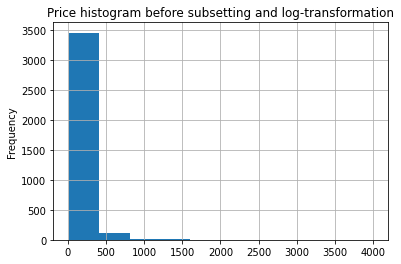

In [32]:
boston['price'].plot(kind='hist', grid=True)
plt.title('Price histogram before subsetting and log-transformation')

In [33]:
boston['price'].skew()

8.521483565683951

In [ ]:
# Prices are heavily skewed in this dataset. In the histogram we can also see most of the data falls under 500. So we'll use a subset of our dataset where the price
# ranges from 50-500 for now to remove very large and very small prices. We'll also log-transform the target variable to reduce skewness.

(3269, 17)


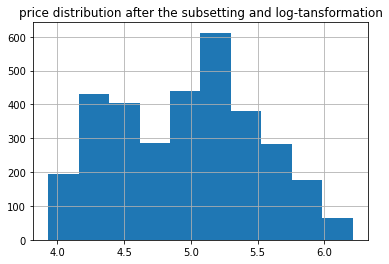

In [34]:
boston = boston[(boston['price']>50)&(boston['price']<500)]
print(boston.shape)
target = np.log(boston.price)
target.hist()
plt.title('price distribution after the subsetting and log-tansformation');

In [35]:
features = boston.drop('price', axis=1)


NameError: name 'featrures' is not defined

In [36]:
print(features.shape)

(3269, 16)


In [37]:
features.head()

,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,35.0,2,0,9.0,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,95.0,10.0,2,36,9.0,t
2,t,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,250.0,50.0,3,41,10.0,f
3,f,1,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,100.0,50.0,1,1,10.0,f
4,t,1,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,250.0,15.0,2,29,10.0,f


In [ ]:
# split the data into train and test set
# Now that we have our features and the target, we can use scikit-learn to split the data for convenience.
# Scikit-learn provides a train_test_split function for splitting a panda DataFrame into a training and testing set.
#
# train_test_split accpets the features and the target as parameters and returns the randomly suffled data. We have set
# 33% of the data in the test set and the rest are in training set.
# The test_size parameter controls what portion of the data should be in the test set. We also set a random_state for reproducability.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.33, random_state=42)

In [ ]:
# Introductin Feature Columns
# Generally, machine learning models take numbers as input and output numbers for efficient implementation. In tensorflow, the models take Dense Tensors as input and outputs Dense Tensors.
# But real world datsets have sprse features like product id, category, location, video id etc.
# For large datasets, converting each of the categorical features to numerical representations often consume a huge amount of time and the process is also error rpone.
# There are also other feature preproecessing steps like bucketization, scaling, crossing fearures, embedding etc prople often take before fedding the data to the models.
# To simplify this process Tensorflwo offers FeatureColumns abstraction.

In [ ]:
# When we instantiate a canned estimator we have to pass it a list of FeatureColumns for the feature_column parameter.
# FeatureColumns handle the conversioin of the sparse or dense(numerical) features to a dense Tensor usable by the core model
#
# The type of Feature column to use depnds on the feature type and the model type.
# Feature type : Numeric and categorical features need to be handled differently
# Model type : Linear models and the neural network models handle categorical features differently.


In [ ]:
# Dense column
#   - numeric_column
#   - indicator_column
#   - embedding_column
#
# categorical column
#    - categorical_column_with_identity
#    - categorical_column_from_vocabulary_file
#    - categorical_column_with_vocabulary_list
#    - categorical_column_with_hash_bucket
#    - crossed_column
#
# Dense column + categorical column
#     - bucketized_column
#

In [ ]:
# in this tutorial we'll show how to handle numeric and the categorical features with two different FeatureColumn.
# To learn more about this topic, you can consult a grea tutorial published by the Tensorflow team in Google Research Blog

# First we'll separate the column names of the numeric features and the categorical features.

In [51]:
# Get all the numeric feature names
numeric_columns = ['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                   'security_deposit', 'cleaning_fee', 'minimum_nights', 'number_of_reviews', 'review_scores_value']

# Get all the categorical featur names that contains strings
categorical_columns = ['host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 
                       'instant_bookable']

In [ ]:
# Numeric Feature Columns
# Numeric features can be represented by numeric_column which is used for real valued features. When we create a numeric_column we have to pass a
# unique string to its key parameter. The value of key will be used as the name of the column. We can also specify the data type or shape of the numeric_column if necesary.
# but here we will just use the defaults.
#
# We use a list comprehension to create numeric_column for all the numeric features. We basically create a numeric_column for each column in the numeric_columns list we made before.

In [52]:
numeric_features = [tf.feature_column.numeric_column(key=column) for column in numeric_columns]

print(numeric_features[0])


NumericColumn(key='host_total_listings_count', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [ ]:
# Categorical Feature Columns
# There are many ways to handle categorical featurs in tensorflow.
# categorical_column_with_vocabulary_list is just one of them. For small number of categories we give the categorical column 
# the fixed list of values the column will take. It represents each categorical feature in it's one-hot vector representation.
#
# In the one hot representation we replace each categorical instance with a n-dimenstional boolearn vector which has the size of the number
# of categories in the feature and marks the presence and absence of each category with 1 and 0. For example if we have a feature 'Gender' with 
# two categories (male, female), each time we see 'male' we will replace it with a vector [1,0] and each time we see 'female' 
# we'll replace it with a vector [0,1]
#
# categorical_column_with_vocabulary_list must have following inputs:
#  key : a unique string identifying the input feature which would be used as the name of the column
#  vocabulary_list : An ordered list defining the possible values for this categorical feature
#
# The syntax goes like this.

In [53]:
Property_type = ['apartment', 'condo', 'apartment', 'villa', 'house', 'house', ...]
property_column = tf.feature_column.categorical_column_with_vocabulary_list(key='Property_type', 
                                vocabulary_list=['house', 'apartment', 'condo', 'villa'])

In [ ]:
# Categorical column representation of 'Property_type' feature
# house --> [1, 0, 0, 0]
# apartment ===> [ 0, 1, 0, 0]
# condo ==> [0, 0, 1, 0]
# villa ==> [0, 0, 0, 1]

In [ ]:
# Other feature column for categorical features are
# - categorical_column_with_identity : returns the column as it is
# - categorical_column_from_vocabulary_file : instead of giving the column values in a list, we read it from a file
# - categorical_column_with_hash_bucket : If the number of values a categorical column can take is really large, instead of writing all the
#      possible values in a list and giving it, we can use hashing to let tensorlfow take care of it behind the scene. But ehere's a chance of hash collision
#      where two or more ctegories can be mapped to same place.
# - crossed_column : we can cross a categorical feature with a numerical or another categorical feature. For example, 
#      let's say we take a categorical feature 'Gender' and another feature Education, we can create new features like 
#      female_x_phd or female_x_bachelors.

In [54]:
categorical_features = [tf.feature_column.categorical_column_with_vocabulary_list(key=column, vocabulary_list=features[column].unique())
                           for column in categorical_columns]

print(categorical_features[3])

VocabularyListCategoricalColumn(key='room_type', vocabulary_list=('Entire home/apt', 'Private room', 'Shared room'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [ ]:
# In this case, use another list comprehension to create all the categorical feature columns directly instead of writing our the vocabulary list for all of them.
# featues[column].unique returns a set vocabulary_list parameter to those values. Then we combine all the numeric and the categorical feature columns to one list so that
# we can pass it to our canned estimator.

In [55]:
linear_features = numeric_features + categorical_features

In [ ]:
# Build Input function
# When we train our model we have to pass the features and the labels to the model. Estimators require that we use an input function for this.
# The input function must return a tuple containing two elements.
# 1.A dictionary that contains the feature column names as key and maps them to the tensors containing the feature data for a training batch
# 2. A list of lables for the training batch.

In [ ]:
# The structure of an input function looks lilke this
#
# def my_input_fn():
#    #preprocess your data here...
#
#    # ....
#    # then return
#    #  1) mapping of feature columns to Tesnsors with the corresponding feature data
#    # and 2) a Tensor containing labels
#    return feature_cols, labels

In [ ]:
# Luckily tensorflow provides functionality for feeding a pandas Dataframe straight into a tensorflow estimator with the pandas_input_fn function.
# pandas_input_fn has many parameters but we will use the following
#   x : pandas DataFrame object that has the features
#   y : pandas Series object that has the labels
#   batch_size : a number specifying the batch size
#   shuffle : boolean whether to shuffle the data or not
#   num_epochs : int. number of epochs to iterate over the data. one epoch means going over all the training data once. None means it will cycle throughinput data forever.

In [ ]:
# Note that pandas_input_fn returns an input function that would feed the data to the tensorflow model. Here we create two input functions 
# training_input_fn and eval_input_fn that takes the training and test set features and labels respectively

#
# num_epoch is set to None in the training_input_fn because we want to go over the training dataset multiple times as the model trains.
# We want to go over the test dataset only once to evaluate the model, so we set num_epoch to 1

In [56]:
# Create training input function
training_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                       y=y_train,
                                                       batch_size=32,
                                                       shuffle=True,
                                                       num_epochs = None)

# create testing input function
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                   y=y_test,
                                                   batch_size=32,
                                                   shuffle=False,
                                                   num_epochs=1)

In [ ]:
# instantiate Model
# We instantiate the linear model by passing the list containing the feature columns to the feature_columns parameter. We also specify a model direcotry with the model_dir parameter
# where tensorflow will store the model graph and other information. 
# We'll be abte to visualize the model architecture and the loss metrics later with tensorboard using them.
# 
# We can choose different optimizers by using the optimizer parameter, but we'll go with the defaults here. The default loss function is sum of squared errors.

In [57]:
linear_regressor = tf.estimator.LinearRegressor(feature_columns=linear_features,
                                               model_dir = './model/linear_regressor')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model/linear_regressor', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f154890bc90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# Train model
# We pass the training_input_fn to the input_fn parameter of the train method and specify the number of steps we want to train the model. Note that
# we have to pass the funtion object(input_fn = training_input_fn) to the input_fn parameter, not the return value of the function call (train_input_fn())

In [58]:
linear_regressor.train(input_fn = training_input_fn, steps=2000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into ./model/linear_regressor/model.ckpt.
INFO:tensorflow:loss = 786.11926, step = 1
INFO:tensorflow:global_step/sec: 395.666
INFO:tensorflow:loss = 24.293745, step = 101 (0.254 sec)
INFO:tensorflow:global_step/sec: 680.531
INFO:tensorflow:loss = 13.4727, step = 201 (0.147 sec)
INFO:tensorflow:global_step/sec: 670.328
INFO:tensorflow:loss = 8.314789, step = 301 (0.151 sec)
INFO:tensorflow:global_step/sec: 694.962
INFO:tensorflow:loss = 10.429558, step = 401 (0.144 sec)
INFO:tensorflow:global_step/sec: 646.283
INFO:tensorflow:loss = 8.939793, step = 501 (0.155 sec)
INFO:tensorflow:gl

In [ ]:
# Evaluate Model
# For evaluating the model we simply pass the eval_input_fn to the imput_fn parameter in regressor.evluate method as we did earlier eith the
# fit method. It returns a dict containing loss after evluating the model on the test set. 
# Currently loss is defined as mean squared error MSE in the linear regressor model.

In [60]:
eval=linear_regressor.evaluate(input_fn = eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-30T23:27:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/linear_regressor/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-06-30-23:27:11
INFO:tensorflow:Saving dict for global step 2000: average_loss = 0.15730597, global_step = 2000, label/mean = 4.9762683, loss = 4.9921513, prediction/mean = 5.075131
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: ./model/linear_regressor/model.ckpt-2000


In [61]:
print(eval['loss'])

4.9921513


In [ ]:
# prediction
# linearRegressor.predict method returns a generator for yielding predictions. Since we have set the num_epoch to 1 the input function
# we are using to feed the data to the evaluation function will go over the test dataset only once.
# We can eaily convert it to a list for getting the predictions.

In [63]:
pred = list(linear_regressor.predict(input_fn=eval_input_fn))
pred = [p['predictions'][0] for p in pred]
pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/linear_regressor/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[4.56527,
 4.6818624,
 4.609328,
 4.9863873,
 5.0135784,
 5.313418,
 5.4584613,
 5.9916515,
 4.536171,
 4.469878,
 5.6229343,
 4.53522,
 5.693219,
 5.8766623,
 5.1139646,
 5.7834177,
 4.5926924,
 5.1646414,
 5.564065,
 4.3651743,
 5.363653,
 5.3296723,
 4.44089,
 4.206328,
 5.0323033,
 4.579748,
 4.566149,
 5.465703,
 5.435743,
 4.978512,
 5.5804844,
 4.2601132,
 4.5152197,
 5.0448627,
 4.5225983,
 4.7608647,
 5.3711476,
 4.5288477,
 5.5466976,
 5.54945,
 5.3797436,
 5.6877813,
 5.0082192,
 4.716586,
 5.1849227,
 4.176996,
 4.466215,
 5.3647532,
 4.7867475,
 4.8402076,
 4.630908,
 5.5375586,
 5.3001037,
 5.4480824,
 5.598991,
 3.8108065,
 4.7823806,
 4.3304915,
 5.343681,
 4.3615217,
 5.1419463,
 4.3521504,
 5.5378866,
 5.97429,
 6.0109115,
 5.3296723,
 4.8451414,
 6.2237124,
 4.780585,
 4.5042305,
 5.3440366,
 5.0164337,
 4.5072618,
 4.759874,
 4.518792,
 5.188066,
 5.282288,
 4.5248237,
 5.4775696,
 5.336378,
 4.4457874,
 4.989557,
 5.785449,
 4.4644637,
 5.2565103,
 4.764019,
 5.417

In [ ]:
# Since we had log-transformed the price before we've to use the exponential function to inverse it and get our prices for the rental values in original dollar terms.

In [64]:
prices = np.exp(pred)
print(prices)

[ 96.088524 107.97097  100.41662  ... 146.03276   76.96138  165.70822 ]


In [ ]:
# Visualizing loss and model architecture with tensorboard
# As mentioned earlier, Tensorboard makes visualizing any model really easy. We simply need to set the logdir parameter to the directory we have saved our estimator model when we want to visualize it.
# When we instantiated the model we can set the model_dir parameter to store the model. Tensorflow automatically save checkpoints and the details of the models under the hood in the model directory
# and we visualize them with tensorboard.
# Let's visualize our linear model with Tensorboard first. Type the following commands in the terminal
# tensorboard --logdir=./model/linear_regressor
# or
# tensorboard --logdir ./model/linear_regressor (for windows)

In [ ]:
# Visualizing Feature Weights
# We may want to check the feature weights for the linear_regressor model. We can find the vairable names for each feature from the model by using the get_variable_names method first
# and then get the weights by using those name. Here we demonstrate how to get the feature weights for the neighbourhoods and visualize them with a pandas dataframe for convenience

#
# First we check how the variable names look like by printing a few names.

In [65]:
linear_regressor.get_variable_names()[5:10]

['linear/linear_model/bathrooms/weights/part_0/Ftrl',
 'linear/linear_model/bathrooms/weights/part_0/Ftrl_1',
 'linear/linear_model/bed_type/weights',
 'linear/linear_model/bed_type/weights/part_0/Ftrl',
 'linear/linear_model/bed_type/weights/part_0/Ftrl_1']

In [66]:
vns = linear_regressor.get_variable_names()
print('variable name count : {}'.format(len(vns)))

variable name count : 52


In [ ]:
# Then we get the feature weights for the neighbourhodd_cleansed categorical feature and store them in property_weights.
# I've made a Dataframe with the feature weights as values and the different neighbourhood names as index for convenience.

In [ ]:
property_weights = linear_regressor.get_variable_value('linear/linear_model/neighbourhood_cleansed/weights').flatten()
property_key = boston['neighbourhood_cleansed'].value_counts().keys()

pd.DataFrame({'Weights':prope})